In [1]:
#We will solve titanic project with deep learning

In [2]:
#Libraries

In [41]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pickle

In [4]:
#Read the data

In [5]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [6]:
#see first 5 cels

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#remove name colon

In [9]:
df_train.drop("Name",axis=1,inplace=True)
df_test.drop("Name",axis=1,inplace=True)
df=df_train

In [10]:
#check

In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
#see mising values

In [13]:
imputer = SimpleImputer(strategy='mean')

In [14]:
# Separate numeric and categorical columns

In [15]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

In [16]:
# Impute missing values for numeric columns using mean

In [17]:
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

In [18]:
# Impute missing values for categorical columns using most frequent

In [19]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [20]:
#check

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [22]:
# MODEL

In [23]:
model=Sequential()
model.add(Dense(155,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [24]:
#data split

In [25]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [26]:
#drop ticket cabin

In [27]:
X.drop("Ticket",axis=1,inplace=True)
X.drop("Cabin",axis=1,inplace=True)

In [28]:
#make dummy colons

In [29]:
X=pd.get_dummies(X,drop_first=True)

In [30]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,3.0,22.0,1.0,0.0,7.2500,1,0,1
1,2.0,1.0,38.0,1.0,0.0,71.2833,0,0,0
2,3.0,3.0,26.0,0.0,0.0,7.9250,0,0,1
3,4.0,1.0,35.0,1.0,0.0,53.1000,0,0,1
4,5.0,3.0,35.0,0.0,0.0,8.0500,1,0,1


In [31]:
#fit model

In [32]:
history=model.fit(X,y,epochs=1000,batch_size=50,validation_split=.20,verbose=1)

Epoch 1/1000
15/15 [==============================] - 4s 78ms/step - loss: 5.8875 - accuracy: 0.5787 - val_loss: 2.2579 - val_accuracy: 0.6425
Epoch 2/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.8599 - accuracy: 0.6166 - val_loss: 0.6259 - val_accuracy: 0.7151
Epoch 3/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.6682 - accuracy: 0.6433 - val_loss: 0.6563 - val_accuracy: 0.6704
Epoch 4/1000
15/15 [==============================] - 0s 17ms/step - loss: 0.6633 - accuracy: 0.6264 - val_loss: 0.6168 - val_accuracy: 0.6760
Epoch 5/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6540 - accuracy: 0.6433 - val_loss: 0.6406 - val_accuracy: 0.6704
Epoch 6/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6540 - accuracy: 0.6348 - val_loss: 0.6342 - val_accuracy: 0.6704
Epoch 7/1000
15/15 [==============================] - 0s 14ms/step - loss: 0.6511 - accuracy: 0.6376 - val_loss: 0.6143 - val_accuracy: 0.6872


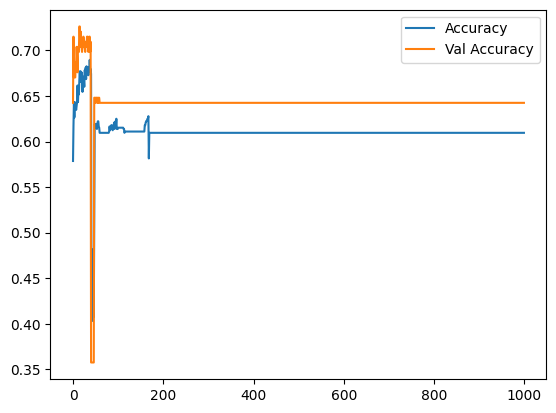

In [33]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend();

In [34]:
#predict test data

In [35]:
df_test.drop("Ticket",axis=1,inplace=True)
df_test.drop("Cabin",axis=1,inplace=True)
df_test=pd.get_dummies(df_test,drop_first=True)

In [38]:
#//

In [37]:
predictions=model.predict(df_test)

14/14 [==============================] - 0s 2ms/step


In [39]:
#save model

In [42]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [43]:
#sources

-Zafer Acar Notes
,-[https://poe.com/chat/2rhcfi4djoj4u359vfr]